In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [3]:
with open('data/titanic.pkl','rb') as f:
    data = joblib.load(f)
locals().update(data)
del data, dt

In [4]:
np.random.seed(1234)
y = titanic.Survived
x = titanic.drop(columns='Survived')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from sklearn.linear_model import LogisticRegression
#n_jobs 모든 코어 사용
clf_log = LogisticRegression(max_iter=400, n_jobs=-1, verbose=1)
clf_log.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31831D+02    |proj g|=  2.39922D+03

At iterate   50    f=  2.91712D+02    |proj g|=  2.64292D+02

At iterate  100    f=  2.78532D+02    |proj g|=  2.52871D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    123    137      1     0     0   3.057D-01   2.785D+02
  F =   278.52382914096472     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(max_iter=400, n_jobs=-1, verbose=1)

In [8]:
pd.DataFrame({'변수명':x.columns, '계수':clf_log.coef_[0]})

,변수명,계수
0,Pclass,-0.936996
1,Sex,-2.532257
2,Age,-0.044543
3,SibSp,-0.398198
4,Parch,-0.011484
5,Fare,0.003283
6,Cabin,-0.078124
7,Embarked,-0.137466


In [9]:
pred_log = clf_log.predict(x_test)
pred_log

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_log)

0.8283582089552238

In [11]:
y_test.value_counts(normalize=True)

0    0.619403
1    0.380597
Name: Survived, dtype: float64

In [13]:
from sklearn.metrics import roc_auc_score
pred_log2 = clf_log.predict_proba(x_test)[:,1]
roc_auc_score(y_test, pred_log2)

0.8528230569336168

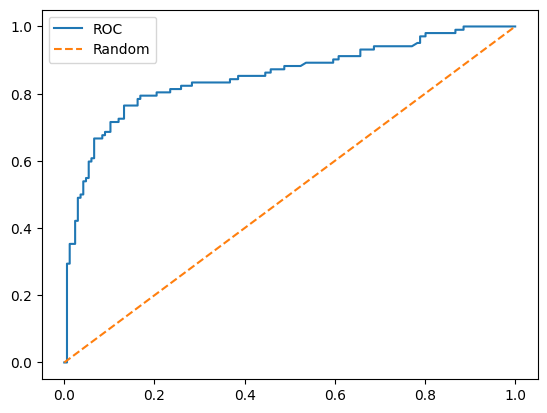

In [14]:
from sklearn.metrics import roc_curve
fprs, tprs, threshold = roc_curve(y_test, pred_log2)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1],'--', label='Random')
plt.legend();